In [1]:
import random
import shapely.geometry as geom
import numpy as np
import networkx as nx
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json
from datetime import datetime

# Set the city name or coordinates for Gurgaon
place_name = "Gurgaon, India"

# Download the street network
gurugram_graph = ox.graph_from_place(place_name, network_type="all")

In [2]:
# ox.plot_graph(ox.project_graph(gurugram_graph), node_size=0, edge_color="gray", bgcolor="white", show=False, figsize=(64, 36))

In [3]:
# Create a GeoDataFrame with your polygon
study_area = gpd.read_file('geodata/study_area.csv')

# Project the GeoDataFrame to the same CRS as the graph
study_area = study_area.set_crs(gurugram_graph.graph['crs'])

In [4]:
# study_area

In [5]:
# Clip the graph to the polygon
study_area_graph = ox.graph_from_polygon(study_area.geometry[0], network_type='drive', retain_all=True)
# study_area_graph = gurugram_graph

In [6]:
dense_area = gpd.read_file('geodata/dense_area.csv')
sparse_area = gpd.read_file('geodata/sparse_area.csv')
blinkit_stores = gpd.read_file('geodata/blinkit_stores.csv')
display(blinkit_stores)

,WKT,name,description,geometry
0,POINT (77.094912 28.462015 0.0),blinkit,,POINT Z (77.09491 28.46202 0.00000)
1,POINT (77.04601 28.427039 0.0),Blinkit sector 47,,POINT Z (77.04601 28.42704 0.00000)
2,POINT (77.041041 28.461018 0.0),Blinkit online store,,POINT Z (77.04104 28.46102 0.00000)
3,POINT (77.086489 28.472832 0.0),Blinkit store,,POINT Z (77.08649 28.47283 0.00000)
4,POINT (77.072826 28.413124 0.0),Blinkit Store (Online) Sector 50,,POINT Z (77.07283 28.41312 0.00000)
5,POINT (77.056567 28.390908 0.0),BlinkIt Store(Dark Store),,POINT Z (77.05657 28.39091 0.00000)
6,POINT (77.073085 28.441506 0.0),Blinkit warehouse,,POINT Z (77.07309 28.44151 0.00000)
7,POINT (77.045226 28.402609 0.0),Blinkit Dark Store,,POINT Z (77.04523 28.40261 0.00000)
8,POINT (77.059314 28.406399 0.0),Blinkit Dark Store,,POINT Z (77.05931 28.40640 0.00000)
9,POINT (77.035943 28.417696 0.0),Blinkit store sector 48,,POINT Z (77.03594 28.41770 0.00000)


In [7]:
all_nodes = list(study_area_graph.nodes)
delivery_executives = random.choices(all_nodes, k=50)

In [8]:
# Example: Assuming dense_area and sparse_area are GeoDataFrames
# Generate random points within dense_area polygon
dense_points = []
while len(dense_points) < 25:
    point = [np.random.uniform(dense_area.bounds.minx.values[0], dense_area.bounds.maxx.values[0]),
             np.random.uniform(dense_area.bounds.miny.values[0], dense_area.bounds.maxy.values[0])]
    if geom.Point(point).within(dense_area.geometry.values[0]):
        dense_points.append(point)

# Generate random points within sparse_area polygon
sparse_points = []
while len(sparse_points) < 25:
    point = [np.random.uniform(sparse_area.bounds.minx.values[0], sparse_area.bounds.maxx.values[0]),
             np.random.uniform(sparse_area.bounds.miny.values[0], sparse_area.bounds.maxy.values[0])]
    if geom.Point(point).within(sparse_area.geometry.values[0]):
        sparse_points.append(point)
        
delivery_points = dense_points + sparse_points

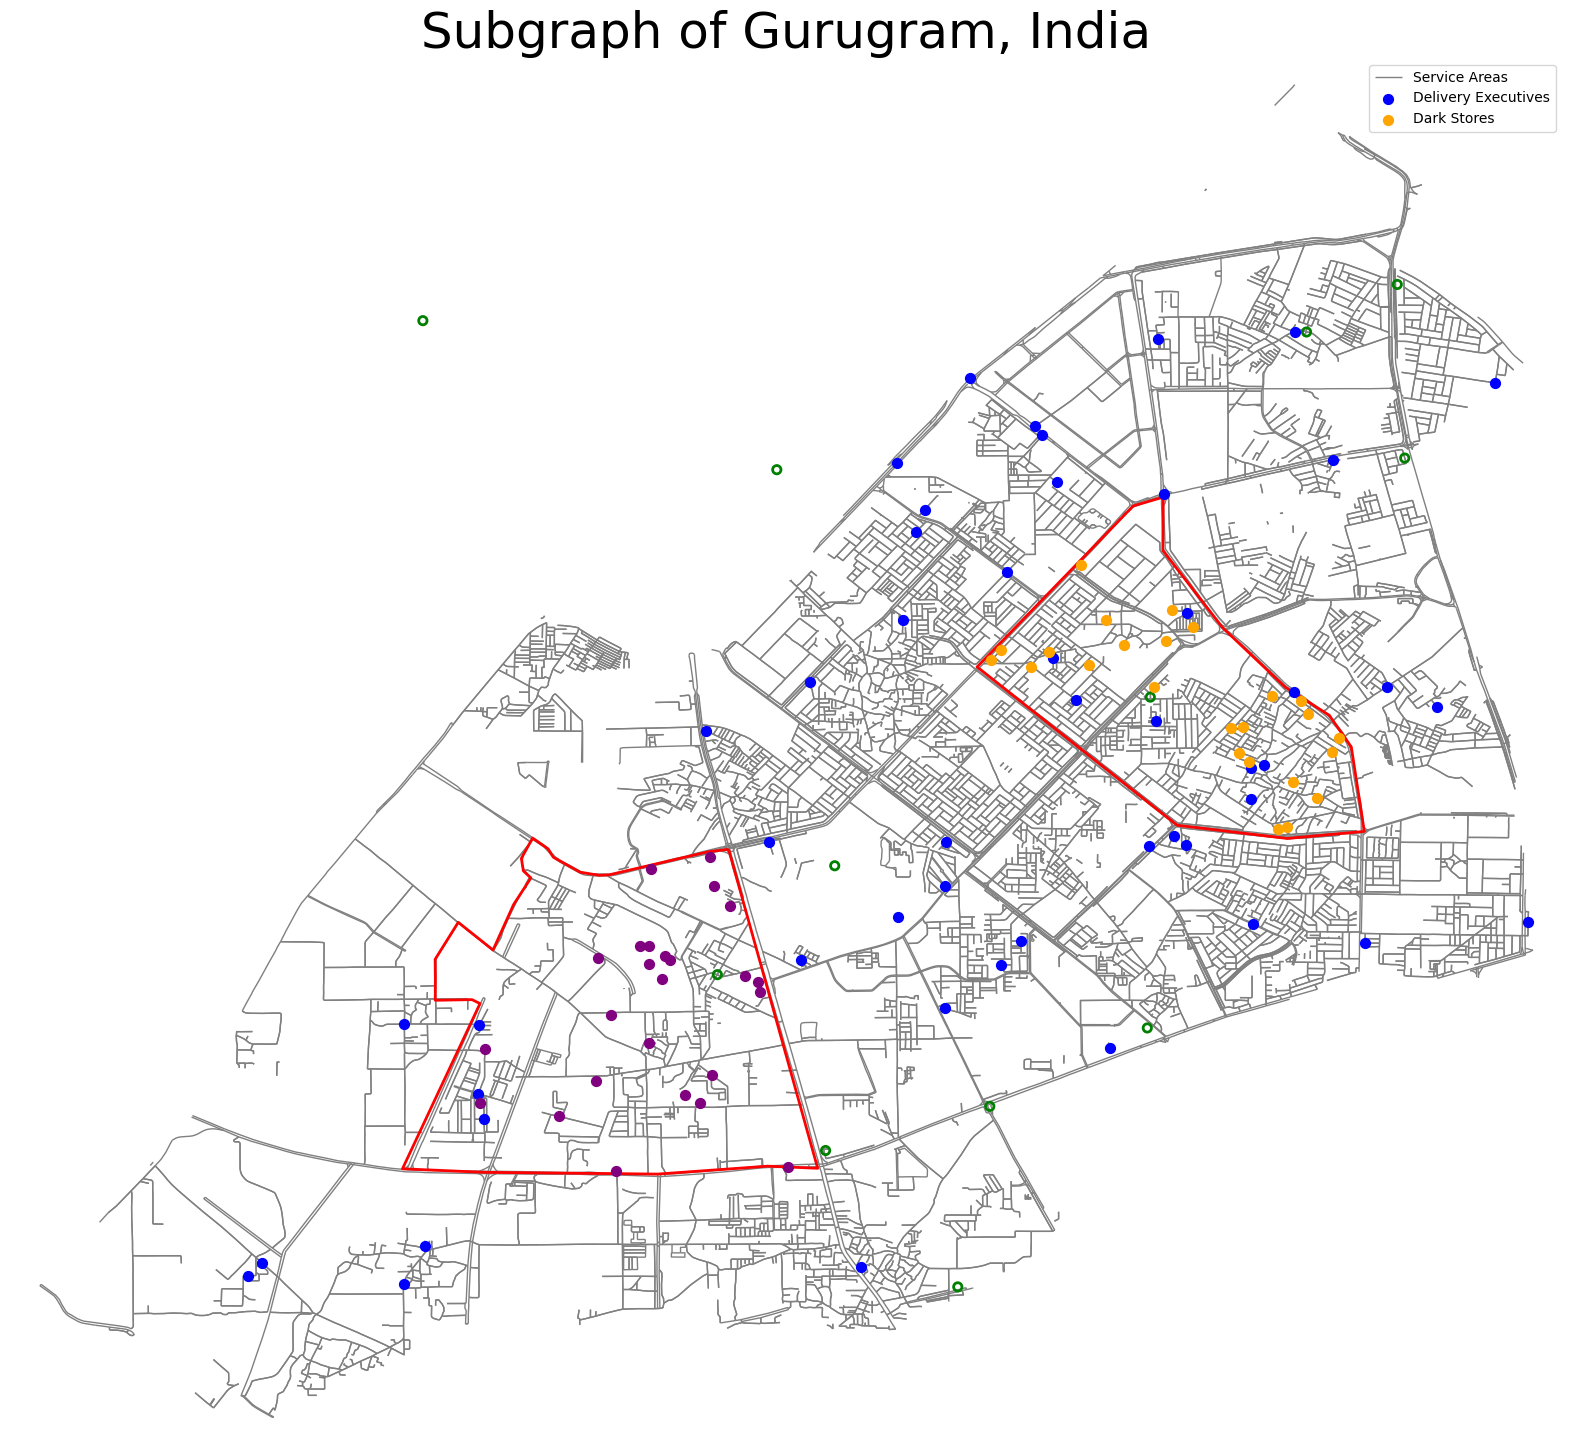

In [9]:
figsize = (32, 18)

fig, ax = ox.plot_graph(study_area_graph, node_size=0, edge_color="gray", bgcolor="white", show=False, figsize=figsize)
ax.scatter(
    [study_area_graph.nodes[node]["x"] for node in delivery_executives],
    [study_area_graph.nodes[node]["y"] for node in delivery_executives],
    c="blue",
    s=50,
    zorder=4,
)
ax.scatter(np.array(dense_points)[:, 0], np.array(dense_points)[:, 1], c="orange", s=50, zorder=4)
ax.scatter(np.array(sparse_points)[:, 0], np.array(sparse_points)[:, 1], c="purple", s=50, zorder=4)

dense_area.plot(ax=ax, color="none", edgecolor="red", linewidth=2, label='Study Area')
sparse_area.plot(ax=ax, color="none", edgecolor="red", linewidth=2)
blinkit_stores.plot(ax=ax, color="none", edgecolor="green", linewidth=2)
ax.set_title("Subgraph of Gurugram, India", fontsize=36)

plt.legend(['Service Areas', 'Delivery Executives', 'Dark Stores'])
plt.show()

In [10]:
display(delivery_executives)

[4132257746,
 1305968612,
 268158645,
 1375622068,
 9917257602,
 6191424586,
 9896791655,
 9944638844,
 9911279855,
 4139962826,
 9896661558,
 267805349,
 6555794094,
 4166107648,
 1760047961,
 4193019408,
 1811209509,
 11009618091,
 7429018710,
 6073419352,
 6094635626,
 410057586,
 2752167826,
 6191539638,
 2752167735,
 2507519194,
 1374811032,
 4191435443,
 3735975777,
 4138670261,
 1669811434,
 4227783300,
 4140253698,
 7547165023,
 1811251645,
 7514256510,
 1811251398,
 9918433819,
 1563402323,
 268919702,
 9903240497,
 7489153269,
 4227690192,
 1811209517,
 4146677547,
 7497463398,
 4220847149,
 7218387677,
 5487614083,
 1374756181]

In [11]:
node1 = delivery_executives[0]
node2 = delivery_executives[1]

shortest_path = nx.shortest_path(study_area_graph,node1, node2, weight='length')
shortest_path_length = nx.shortest_path_length(study_area_graph,node1, node2)

# Plot the graph and highlight the shortest path
fig, ax = ox.plot_graph_route(study_area_graph, shortest_path, route_color='r', node_size=0, bgcolor='w', show=False, close=False, figsize=figsize)

# Plot the starting and ending nodes with a different color
ax.scatter(study_area_graph.nodes[node1]['x'], study_area_graph.nodes[node1]['y'], c='g', s=50, zorder=4)
ax.scatter(study_area_graph.nodes[node2]['x'], study_area_graph.nodes[node2]['y'], c='b', s=50, zorder=4)

plt.show()

NetworkXNoPath: No path between 4132257746 and 1305968612.

In [ ]:
shortest_path_length

In [ ]:
import pandas as pd

In [ ]:
# Example: Create a graph (replace with your graph creation logic)
# Create a distance matrix
distance_matrix = {}

for exec1 in delivery_executives:
    distance_matrix[exec1] = {}
    for exec2 in delivery_executives:
        if exec1 != exec2:
            try:
                # Attempt to calculate the shortest path length between exec1 and exec2
                path_length = nx.shortest_path_length(study_area_graph, exec1, exec2, weight='length')
                distance_matrix[exec1][exec2] = path_length
            except nx.NetworkXNoPath:
                # Handle the case where there is no path between exec1 and exec2
                distance_matrix[exec1][exec2] = float('inf')  # Use a placeholder for unreachable nodes

distance_matrix = pd.DataFrame(distance_matrix)

# Display the distance matrix
# print("Distance Matrix:")
# for exec1 in  delivery_executives:
#     row = [distance_matrix[exec1][exec2] for exec2 in delivery_executives]
#     print(f"Executive {exec1}: {row}")

In [ ]:
distance_matrix

In [ ]:
node1 = delivery_executives[0]
# node2 = delivery_executives[1]

print(type(node1))

shortest_paths = {}

fig, ax = ox.plot_graph(study_area_graph, node_size=0, edge_color="gray", bgcolor="white", show=False, figsize=(64, 36))

for idx, node2 in enumerate(delivery_executives):
        if node1 != node2:
            try:
                # Attempt to calculate the shortest path length between exec1 and exec2
                shortest_path = nx.shortest_path(study_area_graph,node1, node2, weight='length')
                ox.plot_graph_route(study_area_graph, shortest_path, ax=ax, route_color='r', node_size=0, bgcolor='w', show=False, close=False)
                shortest_paths[idx] = path_length
            except nx.NetworkXNoPath:
                # Handle the case where there is no path between exec1 and exec2
                shortest_paths[idx] = None  # Use a placeholder for unreachable nodes

ax.scatter(study_area_graph.nodes[node1]['x'], study_area_graph.nodes[node1]['y'], c='b', s=50, zorder=4)

plt.show()

In [ ]:
# View all attributes for the edges
for edge in study_area_graph.edges(data=True):
    print(f"Edge {edge[0]} - {edge[1]} attributes: {edge[2]}")
